# **Import Libraries and modules**

In [ ]:
# https://keras.io/
#We are first installing the keras package via pip install and importing the keras package
# !pip install -q keras
# import keras

Using TensorFlow backend.


In [ ]:
# importing the numpy package with the alias np
import numpy as np
from tensorflow import keras
# importing sequential model from keras.models
from tensorflow.keras.models import Sequential
# importing different layers and activations from keras.layers
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Add
from tensorflow.keras.layers import Conv2D, MaxPooling2D
# importing np_utils from keras.utils
from tensorflow.keras.utils import np_utils

# importing the mnist dataset from tensorflow.keras.datasets 
from tensorflow.keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

In [ ]:
# we are downloading the MNIST dataset and splitting the data for training and testing
(X_train, y_train), (X_test, y_test) = mnist.load_data()

(60000, 28, 28)


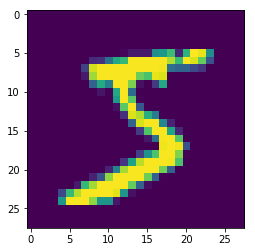

In [ ]:

# printing out the shape of x_train
print (X_train.shape)

# importing pyplot with alias plt from matplotlib package
from matplotlib import pyplot as plt
# %matplotlib inline is a magic function to show us the plots in a notebook
%matplotlib inline
# plotting the first image or the image at index zero in the training dataset
plt.imshow(X_train[0])

In [ ]:
#Reshaping our training and testing datatset using numpy's reshape function which we will feed to the model
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [ ]:
#Doing type conversion or changing the datatype to float32 for the data
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
#Doing standardization or normalization here dividind each pixel by 255 in the train and test data
X_train /= 255
X_test /= 255

In [ ]:

#Checking first 10 image labels
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [ ]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
# simply we can say we are doing sort of onehot encoding
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [ ]:

# having a look in the first 10 datapoints after onehot encoding
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [ ]:

# importing Activation, BatchNormalization and MaxPooling2D from tensorflow.keras.layers for performing maxpooling and batchnormalizing operations and adding non linearity via activation functions
from tensorflow.keras.layers import Activation,BatchNormalization
# building our sequential model using the Sequential class and creating the model object
model = Sequential()
# Performing 2dconvolution followed by BatchNormalization and Dropout
model.add(Conv2D(10, 3, 3, activation='relu', input_shape=(28,28,1))) # channel dimensions = 26x26x10    and Receptive field = 3x3
model.add(BatchNormalization())
model.add(Dropout(0.1))

# Performing 2dconvolution followed by BatchNormalization and Dropout        
model.add(Conv2D(16, 3, 3, activation='relu'))                        # channel dimensions = 24x24x16    and Receptive field = 5x5
model.add(BatchNormalization())
model.add(Dropout(0.1))

# Performing 2dconvolution followed Maxpoooling operation
model.add(Conv2D(10, 1, 1, activation='relu')) #24                    # channel dimensions = 24x24x10    and Receptive field = 7x7 using 1x1 kernel
model.add(MaxPooling2D(pool_size=(2, 2)))#12                                 # channel dimensions = 12x12x10    and Receptive field = 14x14

# Performing 2dconvolution followed by BatchNormalization and Dropout
model.add(Conv2D(16, 3, 3, activation='relu'))#10                     # channel dimensions = 10x10x16    and Receptive field = 16x16
model.add(BatchNormalization())
model.add(Dropout(0.1))

# Performing 2dconvolution followed by BatchNormalization and Dropout
model.add(Conv2D(16, 3, 3, activation='relu'))#8                      # channel dimensions = 8x8x16    and Receptive field = 18x18
model.add(BatchNormalization())
model.add(Dropout(0.1))

# Performing 2dconvolution followed by BatchNormalization and Dropout
model.add(Conv2D(16, 3, 3, activation='relu'))#6                      # channel dimensions = 6x6x16    and Receptive field = 20x20
model.add(BatchNormalization())
model.add(Dropout(0.1))

# Performing 2dconvolution followed by BatchNormalization and Dropout
model.add(Conv2D(16, 3, 3, activation='relu'))#4                      # channel dimensions = 4x4x16    and Receptive field = 22x22
model.add(BatchNormalization())
model.add(Dropout(0.1))

# Performing only 2dconvolution at the last convolution layer(no batchnormalization and dropout)
model.add(Conv2D(10, 4, 4))                                           # using 4x4 kernel to see the complete image

# Here we are Flateening our dat i.e making it one dimensional which we will feed to the network.
model.add(Flatten())
#Using softmax activation function at the last layer which is used for multi class classification
model.add(Activation('softmax'))


Instructions for updating:
Colocations handled automatically by placer.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  """


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (1, 1), activation="relu")`
  from ipykernel import kernelapp as app
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:29: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:34: UserWarning: Update 

In [ ]:
# Seeing the summary of the complete model
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 10)        100       
_________________________________________________________________
batch_normalization_1 (Batch (None, 26, 26, 10)        40        
_________________________________________________________________
dropout_1 (Dropout)          (None, 26, 26, 10)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 16)        1456      
_________________________________________________________________
batch_normalization_2 (Batch (None, 24, 24, 16)        64        
_________________________________________________________________
dropout_2 (Dropout)          (None, 24, 24, 16)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 24, 24, 10)        170       
__________

In [ ]:
# We are importing the Adam Optimizer
from tensorflow.keras.optimizers import Adam

# We are importing the learningratescheduler callback
from tensorflow.keras.callbacks import LearningRateScheduler
#Creating the "scheduler" function with two arguments i.e learningrate and epoch
def scheduler(epoch, lr):
  return round(0.003 * 1/(1 + 0.319 * epoch), 10)

#	LearningRate = LearningRate * 1/(1 + decay * epoch) here decay is 0.319 and epoch is 10.

# here we are compiling our model and using 'categorical_crossentropy' as our loss function and adam as our optimizer with learning rate =0.003 and metrics is accuracy
model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.003), metrics=['accuracy'])

# Here we are traing our model using the data and using batch size of 128,number of epochs are 20 and using verbose=1 for printing out all the results.
# In the callbacks parameter we are using the LearningRateScheduler which takes two arguments scheduler function which we built earlier to reduce the learning rate in each decay and verbose =1
model.fit(X_train, Y_train, batch_size=128, epochs=20, verbose=1, validation_data=(X_test, Y_test), callbacks=[LearningRateScheduler(scheduler, verbose=1)])

Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/20

Epoch 00001: LearningRateScheduler setting learning rate to 0.003.
60000/60000 [==============================] - 9s 153us/step - loss: 0.2244 - acc: 0.9291 - val_loss: 0.0603 - val_acc: 0.9814
Epoch 2/20

Epoch 00002: LearningRateScheduler setting learning rate to 0.0022744503.
60000/60000 [==============================] - 6s 99us/step - loss: 0.0682 - acc: 0.9782 - val_loss: 0.0394 - val_acc: 0.9859
Epoch 3/20

Epoch 00003: LearningRateScheduler setting learning rate to 0.0018315018.
60000/60000 [==============================] - 6s 100us/step - loss: 0.0516 - acc: 0.9840 - val_loss: 0.0339 - val_acc: 0.9885
Epoch 4/20

Epoch 00004: LearningRateScheduler setting learning rate to 0.0015329586.
60000/60000 [==============================] - 6s 101us/step - loss: 0.0427 - acc: 0.9866 - val_loss: 0.0436 - val_acc: 0.9846
Epoch 5/20

Epoch 00005: LearningRateScheduler setting lea

### Acheiving validation accuracy 99.40 in 16th epoch.

In [ ]:
# Here we are evaluating our model using the test data and saving the results in score variable
score = model.evaluate(X_test, Y_test, verbose=0)

In [ ]:
#printing the score or evaluation results
print(score)

[0.016840848704172823, 0.9948]


In [ ]:
#Finally we are doing the predictions
y_pred = model.predict(X_test)

In [ ]:
# Showing the results of predictions
print(y_pred[:9])
print(y_test[:9])

[[1.18588875e-10 1.10197384e-07 9.42100868e-08 6.47855058e-09
  1.69207333e-08 4.17292728e-10 3.07542240e-13 9.99999642e-01
  9.12085338e-11 1.54161228e-07]
 [1.76716426e-07 1.01692115e-06 9.99997020e-01 2.61500765e-10
  3.52892759e-09 6.02455724e-11 1.73723936e-06 4.81673978e-10
  9.86598137e-10 7.51033957e-10]
 [4.95402723e-08 9.99971867e-01 1.43412436e-07 7.42149764e-09
  4.27223176e-06 5.64623903e-08 6.43634053e-07 1.40830582e-06
  2.14284719e-05 9.93460958e-08]
 [9.99749243e-01 2.12012385e-09 1.55717217e-07 1.60171410e-07
  9.67361657e-08 6.64419986e-08 2.48599041e-04 4.07770955e-08
  8.21720391e-07 7.01890883e-07]
 [1.39640198e-12 7.38510697e-10 9.39136546e-11 1.75288006e-09
  9.99962568e-01 5.38754152e-10 1.31076794e-08 3.79924785e-08
  3.76838614e-07 3.70355738e-05]
 [3.12427928e-09 9.99992728e-01 8.69713723e-09 2.73719630e-10
  2.87195166e-06 1.32144284e-09 3.16081348e-08 3.78219397e-06
  5.56979444e-07 5.58845734e-08]
 [8.57431259e-13 2.28732205e-07 1.04959685e-09 9.54893066e